# Exploring Sales

## Purpose
Analyze a year of sales data to provide meaningful insights to stakeholders.

## Methodology
1. Clean the data.
2. Manipulate the data.
3. Explore the data.

## Table of Contents
* [Data Manipulation](#manipulation)</br>
* [Data Exploration](#exploration)
    * [Which months, days of week, and hours of day had the most sales revenue and # of sales?](#time)
    * [Which Cities and States had the most revenue and # of sales?](#location)
    * [Which products were purchased the most?](#product)
    * [Which products were most likely to be purchased together?](#together)

## Interesting Results (Stakeholder's Q&A)
1. Which months had the most sales?
     - **December**
2. Which days of the weeks had the most sales?
    - **Tuesday**
3. Which hours of the day had the most sales?
    - **11am to 1pm and 5pm to 8pm (Peak was 7pm)**
4. Which City had the most sales?
    - **San Francisco**
5. Which States had the most sales?
    - **California**
6. What's the average order amount?
    - **185.49(USD)**
7. Which products were bought the most?
    - **USB-C Charging Cable**
8. Which products were more likely to be bought together?
    - **Iphone and Lightning Charging Cable**

    
## *Suggestions Based on Analysis*
1. *Increase advertising spend during November and December as these were the months with the most sales.*
2. *Increase # of advertising campaigns during the middle of the week (Tuesday/Wednesday).*
3. *Increase # of advertising campaigns during the hours of 10am to 1pm and 4pm to 8pm for maximum ROI.*
4. *Increase advertising spend in California.*
5. *Try to upsell charging cords and headphones with purchases of phones to increase average order amount.*

## Library import

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime as dt
import os

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500

# Visualizations
import matplotlib.pyplot as plt

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Data Importing

In [2]:
# Importing the 12 csv files of monthly sales data and merging them into one table

# Defining the path of the csv files
csv_path = r'C:\Users\19043\Documents\SQL Projects\Exploring Sales with Python'

# Creating a loop to find every file in the path that ends with .csv
files = [file for file in os.listdir(csv_path) if file.endswith('.csv')]

# Creating our table name for all 12 csv files
sales = pd.DataFrame()

# Creating a loop that merges the csv files into one dataframe called "Sales"
for file in files:
    file_path = os.path.join(csv_path, file)
    df = pd.read_csv(file_path)
    sales = pd.concat([sales, df])

# Data Manipulation - Creating Columns and Cleaning the Data <a class="anchor" id="manipulation"></a>

#### Changing Data Types, Deleting NA's and Removing String Rows

In [3]:
# Showing column names and data types
sales.dtypes

# All of our columns are objects. We want to change some of them from an object to an integer/float

# Dropping rows with NaN so we can change data types
sales.dropna(how='any', inplace=True)

# There are rows where the values are strings and not actual numbers. We need to remove these rows
sales = sales[sales["Order ID"] != 'Order ID']

# Changing the data type of the columns we want as integers
int_columns = ['Order ID', 'Quantity Ordered']
float_columns = ['Price Each']
sales[int_columns] = sales[int_columns].astype('int32')
sales[float_columns] = sales[float_columns].astype(float)

#### Creating Month, Day of Week, and Time Columns

In [4]:
# Creating a new Month column taking the first 2 strings of Order Date
sales['Month'] = sales['Order Date'].str[0:2]

# Converting the extracted string month to int32 for easier analysis
sales['Month'] = sales['Month'].astype('int32')

In [5]:
# Converting day of the month into which day of the week it was (Monday, Tuesday, etc)
sales['Day of Week'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%y %H:%M').dt.strftime('%A')

In [6]:
# Creating a new Hour of Day column based on order time
sales['Hour'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%y %H:%M').dt.hour

#### Creating a City and State Column

In [7]:
# Creating a State column by deleting the zipcode at the end and extracting the State from the string
sales['State'] = sales['Purchase Address'].str.replace(r'\s+\d{5}$', '', regex=True).str.split(', ').str[-1]

In [8]:
# Creating a column that shows the city and state (Dallas TX)

# Creating a function to return the City name
def get_city (address):
    return address.split(',')[1]

# Creating a function to return the State name
def get_state (address):
    return address.split(',')[2].split(' ')[1]

# Having the column show City + ' ' + State
sales['City'] = sales['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

#### Creating a Total Sales Column

In [9]:
# Creating a Total Sales column next to the "Price Each" column.
new_column = (sales["Quantity Ordered"]*sales["Price Each"])
sales.insert(loc=4, column='Total Sales', value=new_column)
sales

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,Day of Week,Hour,State,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Friday,8,TX,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Sunday,22,MA,Boston MA
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,CA,Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,CA,Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Tuesday,9,CA,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Tuesday,20,CA,Los Angeles CA
11682,259354,iPhone,1,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,Sunday,16,CA,San Francisco CA
11683,259355,iPhone,1,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,Monday,7,CA,San Francisco CA
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,Thursday,17,CA,San Francisco CA


# Data Exploration - Time to start answering our Stakeholder's Questions <a class="anchor" id="exploration"></a>

#### Which months, days of week, and hours of day had the most sales revenue and # of sales? <a class="anchor" id="time"></a>

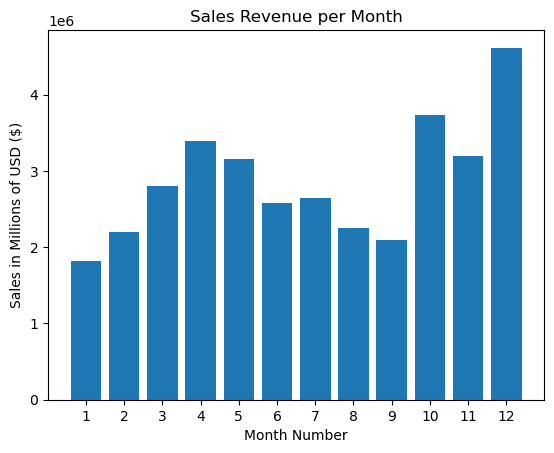

In [10]:
# Calculating amount of revenue for each month
month_sum = sales.groupby('Month').sum(numeric_only=True)
months = range(1,13)

# Creating a bar chart showing Sales revenue per month
plt.bar(months, month_sum['Total Sales'])
plt.xticks(months)
plt.title('Sales Revenue per Month')
plt.ylabel('Sales in Millions of USD ($)')
plt.xlabel('Month Number')
plt.show()

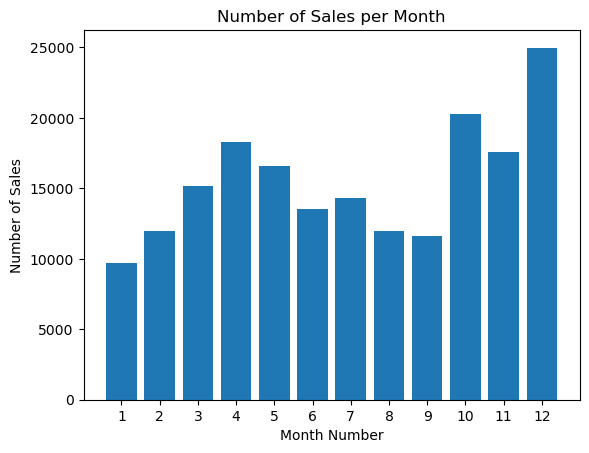

In [11]:
# Calculating number of sales per month
month_count = sales.groupby('Month').count()
months = range(1,13)

# Creating a bar chart showing number of sales per month
plt.bar(months, month_count['Total Sales'])
plt.xticks(months)
plt.title('Number of Sales per Month')
plt.ylabel('Number of Sales')
plt.xlabel('Month Number')
plt.show()

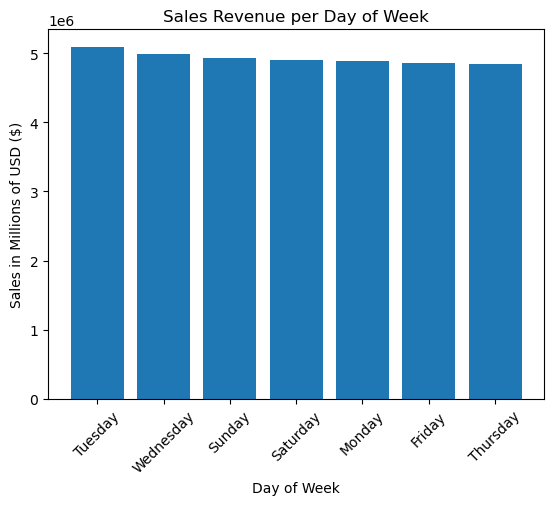

,Order ID,Quantity Ordered,Price Each,Total Sales,Month,Hour
Day of Week,,,,,,
Tuesday,6282426233,30724,5061153.03,5087956.78,193238,390675
Wednesday,6063004874,29799,4960045.85,4988822.26,184072,380808
Sunday,6138139220,29778,4903226.77,4932169.66,188819,384250
Saturday,6084391228,29769,4873105.48,4904357.01,185836,382019
Monday,6163750517,29899,4850763.70,4883326.72,190462,382210
Friday,6037171037,29448,4830795.59,4855938.38,184699,379231
Thursday,6077263917,29662,4810040.26,4839465.16,185521,380961


In [12]:
# Calculating amount of revenue for each day of the Week
day_sum = sales.groupby('Day of Week').sum(numeric_only=True)
day_sum = day_sum.sort_values('Total Sales', ascending=False)

# Creating a bar chart showing Sales revenue per day of week
plt.bar(day_sum.index, day_sum['Total Sales'])
plt.xticks(day_sum.index)
plt.xticks(rotation=45)
plt.title('Sales Revenue per Day of Week')
plt.ylabel('Sales in Millions of USD ($)')
plt.xlabel('Day of Week')
plt.show()
day_sum

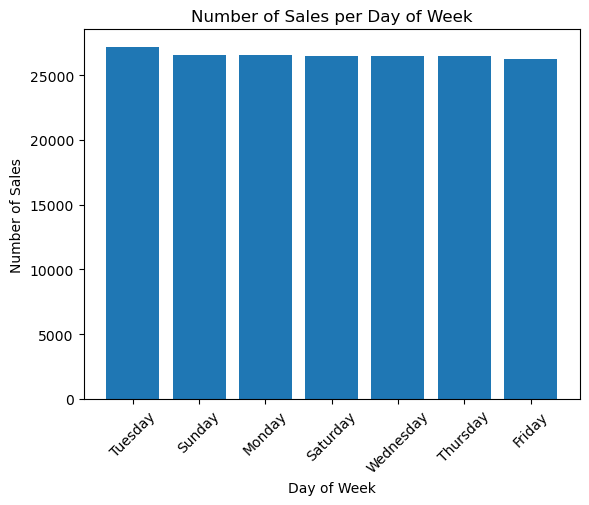

In [13]:
# Calculating # of sales for each Day of the Week
day_count = sales.groupby('Day of Week').count()
day_count = day_count.sort_values('Total Sales', ascending=False)

# Creating a bar chart showing # of Sales per day of week
plt.bar(day_count.index, day_count['Total Sales'])
plt.xticks(day_count.index)
plt.xticks(rotation=45)
plt.title('Number of Sales per Day of Week')
plt.ylabel('Number of Sales')
plt.xlabel('Day of Week')
plt.show()

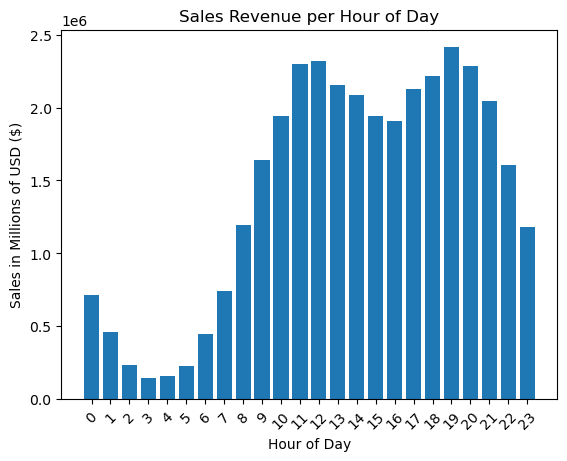

In [14]:
# Calculating amount of revenue for each hour of the day
hour_sum = sales.groupby('Hour').sum(numeric_only=True)

# Creating a bar chart showing Sales revenue per hour of day
plt.bar(hour_sum.index, hour_sum['Total Sales'])
plt.xticks(hour_sum.index)
plt.xticks(rotation=45)
plt.title('Sales Revenue per Hour of Day')
plt.ylabel('Sales in Millions of USD ($)')
plt.xlabel('Hour of Day')
plt.show()

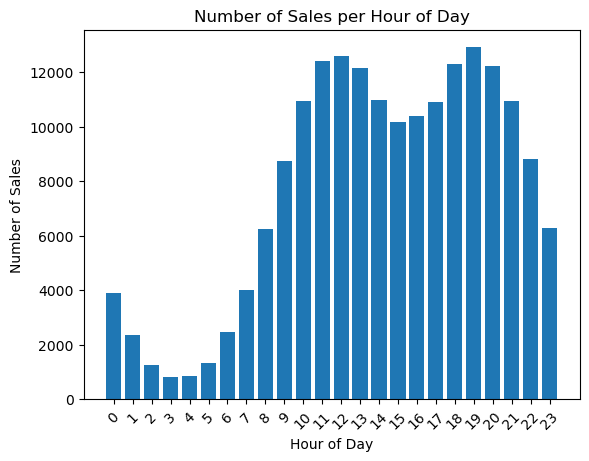

In [15]:
# Calculating # of sales for each hour of the day
hour_count = sales.groupby('Hour').count()

# Creating a bar chart showing # of sales per hour of day.
plt.bar(hour_count.index, hour_count['Total Sales'])
plt.xticks(hour_count.index)
plt.xticks(rotation=45)
plt.title('Number of Sales per Hour of Day')
plt.ylabel('Number of Sales')
plt.xlabel('Hour of Day')
plt.show()

#### Which Cities and States had the most revenue and # of sales? <a class="location" id="data_manipulation"></a>

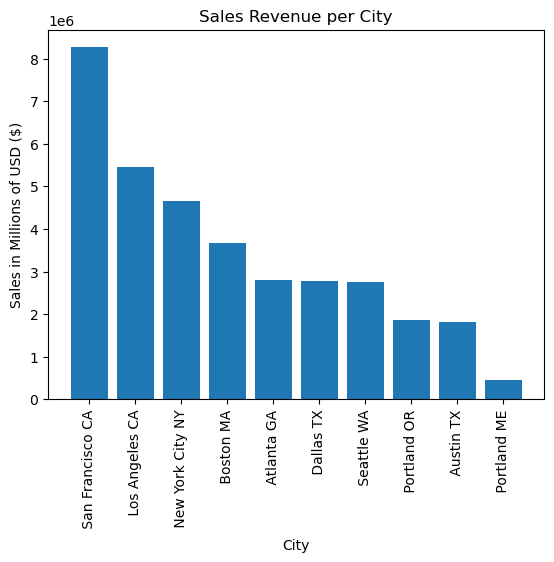

In [16]:
# Calculating amount of revenue for each city
city_sum = sales.groupby('City').sum(numeric_only=True)
city_sum = city_sum.sort_values('Total Sales', ascending=False)

# Creating a bar chart showing Sales revenue per city
plt.bar(city_sum.index, city_sum['Total Sales'])
plt.xticks(city_sum.index)
plt.xticks(rotation=90)
plt.title('Sales Revenue per City')
plt.ylabel('Sales in Millions of USD ($)')
plt.xlabel('City')
plt.show()

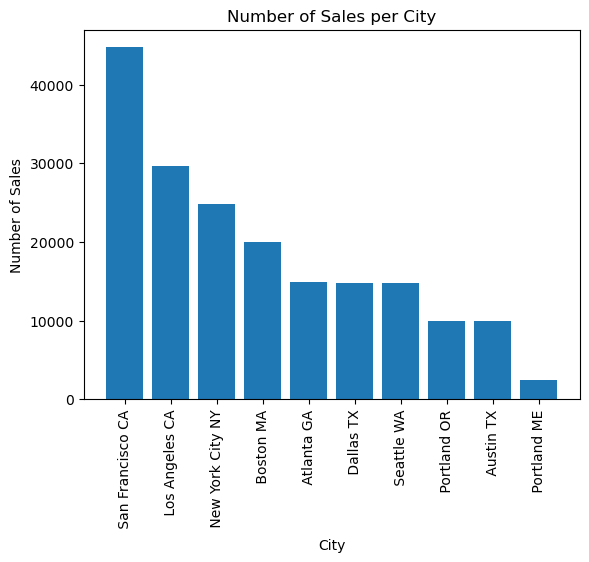

In [17]:
# Calculating # of sales for each city
city_count = sales.groupby('City').count()
city_count = city_count.sort_values('Total Sales', ascending=False)

# Creating a bar chart showing # of sales per city
plt.bar(city_count.index, city_count['Total Sales'])
plt.xticks(city_count.index)
plt.xticks(rotation=90)
plt.title('Number of Sales per City')
plt.ylabel('Number of Sales')
plt.xlabel('City')
plt.show()

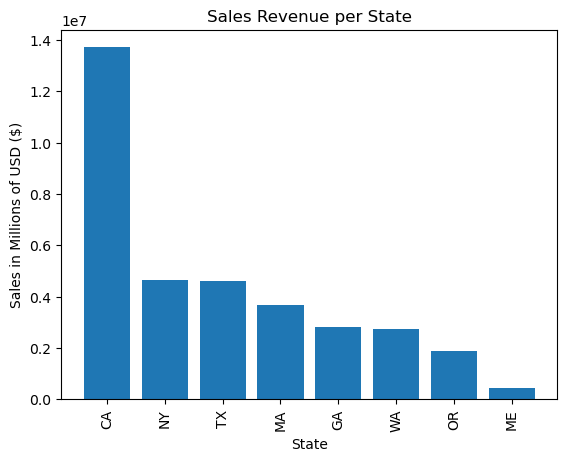

In [18]:
# Calculating amount of revenue for each state
state_sum = sales.groupby('State').sum(numeric_only=True)
state_sum = state_sum.sort_values('Total Sales', ascending=False)

# Creating a bar chart showing Sales revenue per city
plt.bar(state_sum.index, state_sum['Total Sales'])
plt.xticks(state_sum.index)
plt.xticks(rotation=90)
plt.title('Sales Revenue per State')
plt.ylabel('Sales in Millions of USD ($)')
plt.xlabel('State')
plt.show()

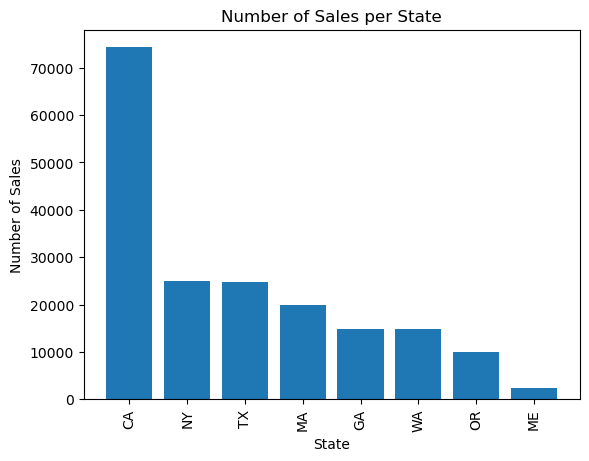

In [19]:
# Calculating # of sales for each state
state_count = sales.groupby('State').count()
state_count = state_count.sort_values('Total Sales', ascending=False)

# Creating a bar chart showing # of sales per state
plt.bar(state_count.index, state_count['Total Sales'])
plt.xticks(state_count.index)
plt.xticks(rotation=90)
plt.title('Number of Sales per State')
plt.ylabel('Number of Sales')
plt.xlabel('State')
plt.show()

#### What was the average order amount?

In [20]:
sales['Total Sales'].mean()

185.490916751815

#### Which products were purchased the most? <a class="anchor" id="product"></a>

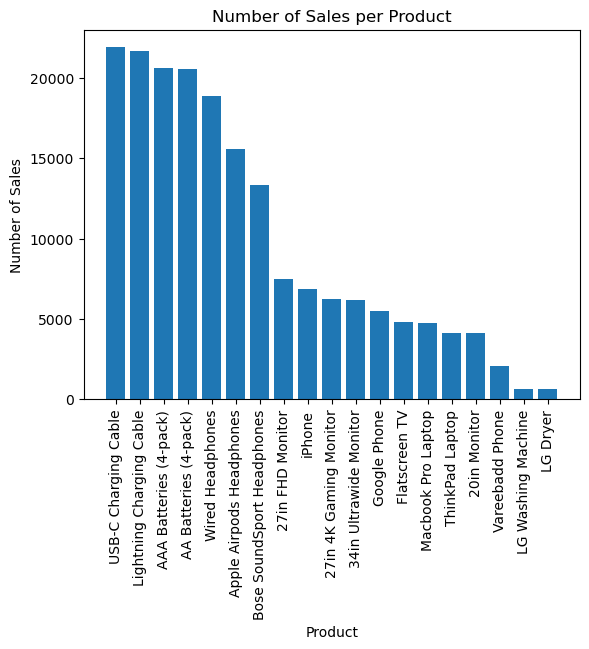

In [21]:
# Calculating # of sales for each product
product_count = sales.groupby('Product').count()
product_count = product_count.sort_values('Quantity Ordered', ascending=False)

# Creating a bar chart showing # of sales for each product
plt.bar(product_count.index, product_count['Quantity Ordered'])
plt.xticks(product_count.index)
plt.xticks(rotation=90)
plt.title('Number of Sales per Product')
plt.ylabel('Number of Sales')
plt.xlabel('Product')
plt.show()

#### Which products were most likely to be purchased together? <a class="anchor" id="together"></a>

In [22]:
duplicate_orders = sales[sales['Order ID'].duplicated(keep=False)].copy()

duplicate_orders['Grouped Products'] = duplicate_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

duplicate_orders = duplicate_orders[['Order ID', 'Grouped Products']].drop_duplicates()

In [23]:
# Importing libraries to help take the count of products purchased with each other.
from itertools import combinations
from collections import Counter

# Creating the Counter
count = Counter()

# Create a loop to find order ids with 2 products in them and then taking the count of products bought together
for row in duplicate_orders['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
# Showing top 10 most purchased product combinations    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]